<a href="https://colab.research.google.com/github/RupeshSharma14/ML-Algorithms/blob/main/Multinomial_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Loading the data

import scipy.io as sio

data = sio.loadmat("/content/drive/MyDrive/Colab Notebooks/ex3data1.mat")
X = data["X"]
y = data["y"]
y = y.reshape(len(y))

m, n = X.shape

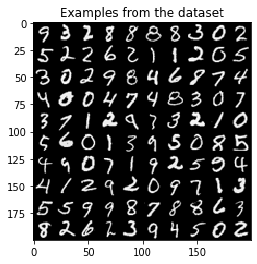

In [3]:
# Visualization of the 100 random samples from the data

import random
from PIL import Image

# get 100 random images from the dataset
num_samples = 100
samples = random.sample(list(X), num_samples)
display_img = Image.new("RGB", (200, 200))

# loop over the images, turn them into a PIL image
i = 0
for col in range(10):
  for row in range(10):
    array = samples[i]
    array = ((array / max(array)) * 255).reshape((20, 20)).T
    img = Image.fromarray(array)
    display_img.paste(img, (col*20, row*20))
    i += 1

# present display_img
plt.title("Examples from the dataset")
plt.imshow(display_img, interpolation="nearest");

In [4]:
# Add a bias column to X

bias = np.ones((m, 1))
X = np.append(bias, X, axis = 1)
m, n = X.shape

In [5]:
# Sigmoid function

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [6]:
# Cost function

def cost_func(theta, X, y, lamda_):
  m = len(y)
  regularization = lambda_ / (2 * m) * np.sum(theta[1:] **2)
  cost = 1/m * (-y.T @ np.log(sigmoid(X @ theta)) - (1-y).T @ np.log(1 - sigmoid(X @ theta)))
  return cost + regularization

In [7]:
# Gradient derivative 

def gradient_func(theta, X, y, lambda_):
  m = len(y)
  n = len(theta)
  gradient = np.ones(n)
  hx = sigmoid(X @ theta)
  gradient = (1 / m) * X.T @ (hx - y)
  regularization = (lambda_ / m) * theta
  regularization[0] = 0
  
  return gradient + regularization

In [8]:
# Conjugate Gradient Descent

from scipy.optimize import minimize

def train(X, y, K, lamda_):
  n = X.shape[1]
  theta = np.zeros((n, K))
  for k in range(0, K):
    init_theta = np.zeros(n)
    label = np.where(y == (k+1), 1, 0)
    results = minimize(cost_func, init_theta, args = (X, label, lambda_),
                       method = "CG", jac = gradient_func,
                       options = {"maxiter": 400, "disp" : 0})
    theta_found = results.x
    theta[:, k] = theta_found


  return theta

In [9]:
alpha = 0.01
lambda_ = 1
iterations = 1500
K = 10
theta= train(X, y, K, lambda_)

In [10]:
# Training accuracy

accuracy = np.mean(np.argmax(sigmoid(X @ theta), axis = 1) + 1 == y) * 100
print(f'Training set accuracy using Multinomial Logistic Regression {accuracy}%')

Training set accuracy using Multinomial Logistic Regression 94.46%
